In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import plotly.express as px

In [34]:
dfT = pd.read_csv('./data/thyroidDF.csv')
# retirando as colunas que não iremos utilizar para treinar o modelo
dfT.drop(columns=['patient_id', 'TSH_measured', 'T3_measured', 'TT4_measured', 
                  'T4U_measured', 'FTI_measured', 'TBG', 'TBG_measured', 
                  'referral_source'], axis=1, inplace=True)

#### Precisamos fazer grupos que dividam a classe 'target' nos subgrupos de diagnóstico
<br />
1. hyperthyroid conditions:

    A   hyperthyroid
    B   T3 toxic
    C   toxic goitre
    D   secondary toxic
    
<br />
2. hypothyroid conditions:

    E   hypothyroid
    F   primary hypothyroid
    G   compensated hypothyroid
    H   secondary hypothyroid

<br />

##### Nós fizemos isso com esse código no início do entendimento do dataset

<br />

```

diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

dfT['target'] = dfT['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
dfT.dropna(subset=['target'], inplace=True)

```


In [3]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [4]:
# porcentagem de linhas vazias que sobraram depois de termos retirados algumas colunas

(dfT.isna().sum() / 9172) * 100

age                    0.000000
sex                    3.347143
on_thyroxine           0.000000
query_on_thyroxine     0.000000
on_antithyroid_meds    0.000000
sick                   0.000000
pregnant               0.000000
thyroid_surgery        0.000000
I131_treatment         0.000000
query_hypothyroid      0.000000
query_hyperthyroid     0.000000
lithium                0.000000
goitre                 0.000000
tumor                  0.000000
hypopituitary          0.000000
psych                  0.000000
TSH                    9.180113
TT4                    4.819014
T4U                    8.820323
FTI                    8.744003
target                 0.000000
dtype: float64

In [42]:
diagnoses = {'-': 'negative',
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

dfT['target'] = dfT['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
dfT.dropna(subset=['target'], inplace=True)

In [43]:
dfT.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,f,0.3,NaN,NaN,NaN,NaN,negative
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,f,1.6,1.9,128.0,NaN,NaN,negative
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative
5,60,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,NaN,NaN,NaN,negative


In [44]:
dfT.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,target
9166,70,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,88.0,0.74,119.0,negative
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,64.0,0.83,77.0,negative
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,91.0,0.92,99.0,negative
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,f,NaN,NaN,75.0,0.85,88.0,negative
9171,31,M,f,f,f,f,f,f,f,t,...,f,f,f,f,NaN,NaN,66.0,1.02,65.0,negative


In [ ]:
#dfT['age'].max()

In [45]:
dfT.describe()


,age,TSH,T3,TT4,T4U,FTI
count,7546.000000,6824.000000,5337.000000,7192.000000,6870.000000,6877.000000
mean,78.013782,5.421753,2.020935,105.203373,0.967322,110.571745
std,1305.258137,26.080471,0.809865,32.606462,0.162315,36.600867
min,1.000000,0.005000,0.050000,2.000000,0.190000,1.400000
25%,37.000000,0.570000,1.600000,87.000000,0.870000,93.000000
50%,55.000000,1.400000,2.000000,103.000000,0.960000,108.000000
75%,67.000000,2.700000,2.300000,121.000000,1.060000,125.000000
max,65526.000000,530.000000,18.000000,430.000000,2.120000,839.000000


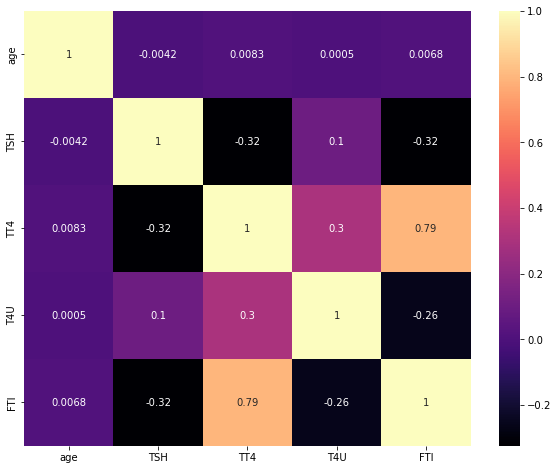

In [9]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(dfT.corr(), annot=True, cmap="magma");

In [ ]:
dfT.shape, dfT.columns

# indices que são numéricos
# 0 17 19 21 23 25 27

In [10]:
# Esse valor tem os dados desbalanceados devido uma quantidade de NaN presente
# E por termos valores vazios no dataset

dfT.mean()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_5788\2626342529.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfT.mean()


age     78.013782
TSH      5.421753
TT4    105.203373
T4U      0.967322
FTI    110.571745
dtype: float64

In [11]:
dfT['TT4'].mean()

105.20337319243603

In [48]:
dfT[dfT['TT4'] == dfT.isnull()].index = dfT['TT4'].mean()
dfT[dfT['T3'] == dfT.isnull()].index = dfT['T3'].mean()
dfT[dfT['TSH'] == dfT.isnull()].index = dfT['TSH'].mean()
dfT[dfT['T4U'] == dfT.isnull()].index = dfT['T4U'].mean()
dfT[dfT['FTI'] == dfT.isnull()].index = dfT['FTI'].mean()

C:\Users\Matheus\AppData\Local\Temp\ipykernel_5788\972577747.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfT[dfT['TT4'] == dfT.isnull()].index = dfT['TT4'].mean()


TypeError: Index(...) must be called with a collection of some kind, 105.20337319243603 was passed

In [25]:
#sns.histplot(x=dfT['TBG'], y=dfT['T4U'], kde=True, color='darkblue');

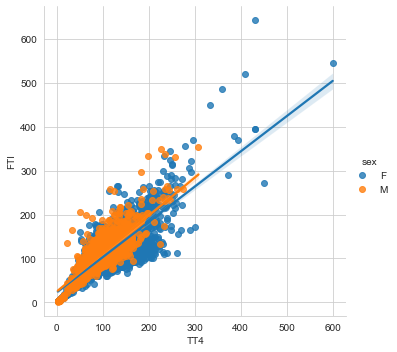

In [36]:
sns.lmplot(data=dfT,
          x='TT4', y='FTI',
           hue='sex');

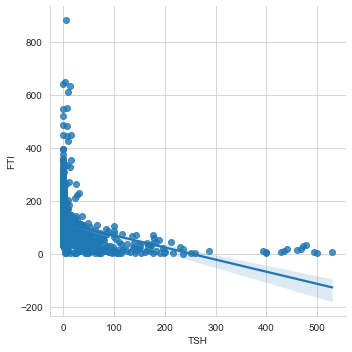

In [37]:
sns.lmplot(data=dfT,
          x='TSH', y='FTI');

<AxesSubplot:xlabel='T4U', ylabel='TT4'>

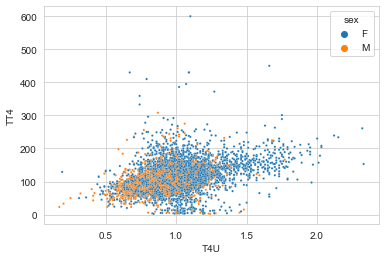

In [38]:
sns.scatterplot(data=dfT, x='T4U', y='TT4', s=5, hue='sex')

<AxesSubplot:xlabel='T4U', ylabel='TSH'>

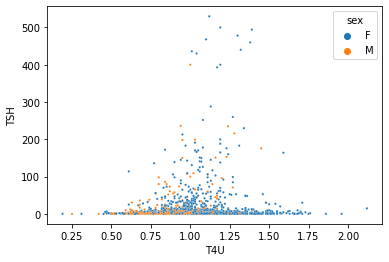

In [29]:
sns.scatterplot(data=dfT, x='T4U', y='TSH', s=5, hue='sex')

C:\Users\Matheus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


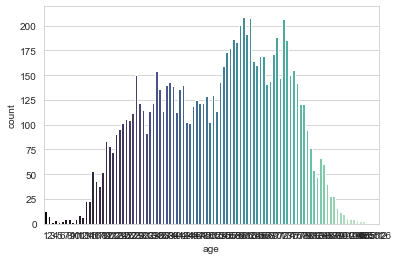

In [39]:
sns.countplot(dfT['age'], palette='mako');
# dfT[dfT['age'] <= 0] >>>> sem idades negativas

In [31]:
# Pessoas com mais de 100 anos de idade apresentam valor de diagnóstico 'negativo'
dfT[dfT['age'] >= 100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,lithium,goitre,tumor,hypopituitary,psych,TSH,TT4,T4U,FTI,target
2976,455,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.10,118.0,1.13,104.0,negative
5710,65511,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.38,113.0,1.08,104.0,negative
6392,65512,M,f,f,f,f,f,f,f,f,...,f,f,f,f,f,0.03,112.0,0.84,133.0,negative
8105,65526,F,f,f,f,f,f,f,f,f,...,f,f,f,f,f,1.50,132.0,1.02,129.0,negative


In [32]:
# changing age of observations with ('age' > 100) to null
# dfT['age'] = np.where((dfT.age > 100), np.nan, dfT.age)
# dfT[dfT['age'] >= 100]

<AxesSubplot:xlabel='target', ylabel='FTI'>

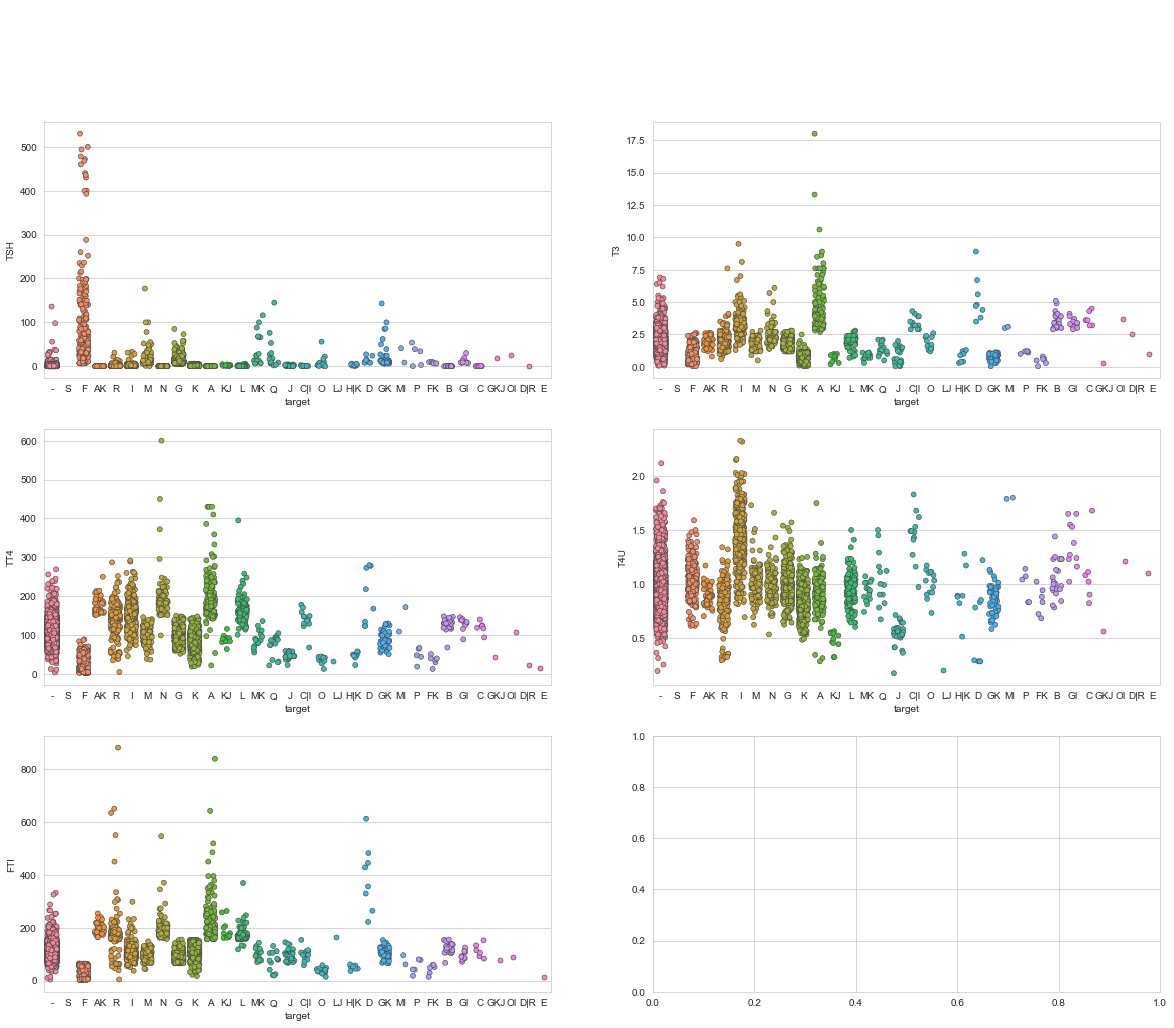

In [41]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,16))
fig.suptitle('Numerical Attributes vs. Target', color='white')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])

# T3 vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])

# TT4 vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])

# T4U vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])

# FTI vs. 'target'
sns.stripplot(x=dfT.target, y=dfT.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])

# TBG vs. 'target'
# sns.stripplot(x=dfT.target, y=dfT.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

In [ ]:
numericalDF = dfT[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target']].copy()
sns.set_style('whitegrid');
sns.pairplot(numericalDF, hue='target', height=3);
plt.show()

In [ ]:
dfT = dfT.select_dtypes(include='object')
dfT['sex'] = dfT['sex'].map({'F' : 0, 'M' : 1})
# to get all the columns except the sex & target
cols = dfT.loc[:, ~dfT.columns.isin(['sex','target','referral_source'])] 

for c in cols:
    dfT[c] = dfT[c].map({'f' : 0, 't' : 1})

In [ ]:
dfT = dfT.drop_duplicates()

In [ ]:
X = dfT.iloc[:, 0:15].values
X

In [ ]:
y = dfT.iloc[:, 15].values
y

### Treinando os modelos

In [ ]:
## Dividindo a base de dados em treino e teste

from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(X_treinamento, y_treinamento)

In [ ]:
previsoes = naive.predict(X_teste)


In [ ]:
accuracy_score(y_teste, previsoes) * 100

In [ ]:
confusion_matrix(y_teste, previsoes)

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(naive)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes))

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
arvore = DecisionTreeClassifier(criterion='entropy')
arvore.fit(X_treinamento, y_treinamento)

In [ ]:
arvore.feature_importances_

In [ ]:
from sklearn import tree
previsores = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
              'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
              'goitre', 'tumor', 'hypopituitary', 'psych']

figura, eixos = plt.subplots(figsize=(150,150),nrows=1, ncols=1)
tree.plot_tree(arvore, feature_names=previsores, 
               class_names=arvore.classes_, filled=True)

In [ ]:
previsoesArvore = arvore.predict(X_teste)

In [ ]:
accuracy_score(y_teste, previsoesArvore)

In [ ]:
cm = ConfusionMatrix(arvore)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoesArvore))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest = RandomForestClassifier(n_estimators=10, 
                                       criterion='entropy', 
                                       random_state = 0)

random_forest.fit(X_treinamento, y_treinamento)

In [ ]:
previsoes_RandomFlorest = random_forest.predict(X_teste)


In [ ]:
accuracy_score(y_teste, previsoes_RandomFlorest)

In [ ]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_RandomFlorest))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 5, metric='minkowski', p = 2)
knn.fit(X_treinamento, y_treinamento)

In [ ]:
previsoes_knn = knn.predict(X_teste)


In [ ]:
accuracy_score(y_teste, previsoes_knn)

In [ ]:
cm = ConfusionMatrix(knn)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_knn))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(random_state=1)
logistic.fit(X_treinamento, y_treinamento)

In [ ]:
previsoes_LogisticReg = logistic.predict(X_teste)

In [ ]:
accuracy_score(y_teste, previsoes_LogisticReg)

In [ ]:
cm = ConfusionMatrix(logistic)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=1, C = 2.0) # 2 -> 4
svm.fit(X_treinamento, y_treinamento)

In [ ]:
previsoes_svm = svm.predict(X_teste)

In [ ]:
cm = ConfusionMatrix(svm)
cm.fit(X_treinamento, y_treinamento)
cm.score(X_teste, y_teste)

In [ ]:
print(classification_report(y_teste, previsoes_svm))